# Google Play Store Apps Analysis

## by Justin Sierchio

In this analysis, we will be looking at applications in the Google Play store . Ideally, we would like to be able to answer the following questions:

<ul>
    <li>What apps are being downloaded?</li>
    <li>Which apps have the highest content ratings?</li>
    <li>Which developers are most active?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/gauthamp10/google-playstore-apps/download. More information related to the dataset can be found at: https://www.kaggle.com/gauthamp10/google-playstore-apps.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_APPS = pd.read_csv("Google-Playstore.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from Google Play Store dataset
df_APPS.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


## Data Cleaning

To begin this analysis, take an initial look at the data and perform any necessary cleaning.

In [4]:
# Display the column names for the Google Apps dataset
df_APPS.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

As we can see, we have the following fields in the dataset:
<ul>
    <li>App Name - self-explanatory</li>
    <li>App ID - self-explanatory</li>
    <li>Category - the general area of the app</li>
    <li>Rating - user ratings for the app</li>
    <li>Rating Count - self-explanatory</li>
    <li>Installs - number of installs for the app</li>
    <li>Minimum Installs - the minimum number of verified installs</li>
    <li>Maximum Installs - the maximum number of verified installs</li>
    <li>Price - the price of the app</li>
    <li>Currency - the currency used to state the app price</li>
    <li>Size - the size of the app [in Megabytes (M)]</li>
    <li>Minimum Android - the minimum version of Android needed to run the app</li>
    <li>Free - whether the app is free or not</li>
    <li>Developer ID - self-explanatory</li>
    <li>Developer Website - self-explanatory</li>
    <li>Developer Email - self-explanatory</li>
    <li>Released - date of app release</li>
    <li>Last Updated - self-explanatory</li>
    <li>Content Rating - which audience the app is suitable for</li>
    <li>Privacy Policy - website containing app privacy policy</li>
    <li>Ad-Supported - whether the app is supported by ads or not</li>
    <li>In App Purchases - whether the app has in-app purchases or not</li>
    <li>Editors Choice - whether the app was rated as an Editor's Choice</li>

Now let's determine the shape of the dataset.

In [5]:
# Determine shape of Google Apps dataset
df_APPS.shape

(1118136, 23)

As we can see, there are over 1 million apps in the Google Play App Store and 23 identifable columns (as we demonstrated previously). Now let's determine the number of 'null' and 'NaN' values in the dataset.

In [6]:
# Determine 'null' or 'NaN' values in Google Apps dataset
df_APPS.isnull().sum()

App Name                  1
App Id                    0
Category                  3
Rating                 6850
Rating Count           6850
Installs                161
Minimum Installs        161
Maximum Installs          0
Free                      0
Price                     0
Currency                161
Size                      0
Minimum Android        2013
Developer Id              2
Developer Website    414366
Developer Email          22
Released               7730
Last Updated              0
Content Rating            0
Privacy Policy       153524
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64

Since there are a significant number of apps that lack of developer website and privacy policy, we will drop those columns from our analysis.

In [7]:
# Delete the 'Developer Website' and 'Privacy Policy' columns from the dataset
df_APPS.drop('Developer Website', axis=1, inplace=True)
df_APPS.drop('Privacy Policy', axis=1, inplace=True)

# Display the modified dataset
df_APPS.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,2.7M,2.3 and up,Xavier Roche,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,86M,5.1 and up,Skizze Games,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,5.8M,4.1 and up,TheMauSoft,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,59M,4.4 and up,MobiSystems,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,29M,5.0 and up,Arthelion92,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,False,False,False


With that change, let's remove the remaining 'null' and 'NaN' rows from the dataset.

In [8]:
# Remove the remaining 'null' and 'NaN' values from the dataset
df_APPS = df_APPS.dropna()

# Display shape of modified dataset
df_APPS.shape

(1108302, 21)

In [9]:
# Verify there are no more 'null' values
df_APPS.isnull().sum().sum()

0

In [10]:
# Verify there are no more 'NaN' values
df_APPS.isna().sum().sum()

0

At this juncture, we can have confidence that there are only real values. Now let's working on converting the date types to something useful.

In [11]:
# Check variable types for each column in the modified dataset
df_APPS.dtypes

App Name             object
App Id               object
Category             object
Rating              float64
Rating Count        float64
Installs             object
Minimum Installs    float64
Maximum Installs      int64
Free                   bool
Price               float64
Currency             object
Size                 object
Minimum Android      object
Developer Id         object
Developer Email      object
Released             object
Last Updated         object
Content Rating       object
Ad Supported           bool
In App Purchases       bool
Editors Choice         bool
dtype: object

In [12]:
# Create columns for 'Release Year' and 'Release Month'
df_APPS['Release Year'] = pd.DatetimeIndex(df_APPS['Released']).year
df_APPS['Release Month'] = pd.DatetimeIndex(df_APPS['Released']).month

# Display the changes to the dataset
df_APPS.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Release Year,Release Month
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,False,False,False,2013,8
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,True,True,False,2018,7
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,True,False,False,2016,3
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,True,True,False,2011,12
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,False,False,False,2016,9


For the purposes of this analysis, we will use 'maximum installs' as the install criterion. Hence, we can drop 'Installs' and 'Minimum Installs' from the dataset.

In [13]:
# Delete the 'Installs' and 'Minimum Installs' columns from the dataset
df_APPS.drop('Installs', axis=1, inplace=True)
df_APPS.drop('Minimum Installs', axis=1, inplace=True)

# Display the modified dataset
df_APPS.head()

,App Name,App Id,Category,Rating,Rating Count,Maximum Installs,Free,Price,Currency,Size,...,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Release Year,Release Month
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,351560,True,0.0,USD,2.7M,...,Xavier Roche,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,False,False,False,2013,8
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,2161778,True,0.0,USD,86M,...,Skizze Games,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,True,True,False,2018,7
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,79304739,True,0.0,USD,5.8M,...,TheMauSoft,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,True,False,False,2016,3
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,163660067,True,0.0,USD,59M,...,MobiSystems,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,True,True,False,2011,12
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,73463,True,0.0,USD,29M,...,Arthelion92,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,False,False,False,2016,9


The dataset appears now ready for exploratory data analysis.

## Exploratory Data Analysis

To begin this analysis, let's take a look at the top 25 apps that are downloaded in the Google Play Apps Store. We can accomplish this task by sorting by maximum installs and displaying the result.

In [14]:
# List the Top 25 apps downloaded in the Google Play Store
print('Here are the Top 25 Apps downloaded in the Google Play Store:\n')
df_APPS_Downloads = df_APPS[['App Name','Maximum Installs']];
df_APPS_DownloadsSort = df_APPS_Downloads.sort_values(by = 'Maximum Installs', ascending = False);
print(df_APPS_DownloadsSort.head(25))

Here are the Top 25 Apps downloaded in the Google Play Store:

                                                 App Name  Maximum Installs
11491                                Google Play services       10772700105
220811                                            YouTube        8571451598
220810                                             Google        8008951294
39                                  Google Text-to-Speech        7769956479
221597                       Google Chrome: Fast & Secure        7692260405
220807                                              Gmail        7599203833
221599                                  Google Play Music        6471273083
221618                                       Google Drive        6268278970
220926                                 WhatsApp Messenger        5769032709
221594            Google TV (previously Play Movies & TV)        5554187901
221603                                      Google Photos        4956331694
220950           Messenge

As one can see, Google's own applications dominate the Google Play Store with downloads for such apps as YouTube, Google, Chrome, Gmail, Google Play Music, Google Drive, Google TV and Google Photos. 

Let's shift our analysis to look at which types of apps are being downloaded the most. Here we will limit our results to the top 15.

In [15]:
# List the Top 15 App Categories in the Google Play Store
print('Here are the Top 15 Apps downloaded in the Google Play Store:\n')
df_APPS_Downloads2 = df_APPS[['Category','Maximum Installs']];
df_APPS_Downloads2Sort = df_APPS_Downloads2.sort_values(by = 'Maximum Installs', ascending = False);
print(df_APPS_Downloads2Sort.head(15))

Here are the Top 15 Apps downloaded in the Google Play Store:

                       Category  Maximum Installs
11491                     Tools       10772700105
220811  Video Players & Editors        8571451598
220810                    Tools        8008951294
39                        Tools        7769956479
221597            Communication        7692260405
220807            Communication        7599203833
221599            Music & Audio        6471273083
221618             Productivity        6268278970
220926            Communication        5769032709
221594  Video Players & Editors        5554187901
221603              Photography        4956331694
220950            Communication        4778683949
220788            Communication        4737952511
220805            Entertainment        4321668229
237092                   Social        3813413261


The above results shown that tools, communication, music and productivity are the most common type of apps that are downloaded in the Google Play Apps Store.

Now let's look at the best rated apps. However, in order to place more weight upon apps that are more heavily used, let's create another column called 'Rating Index' which will multiply the rating score by the rating count.

In [16]:
# Create column for Rating Index = Rating * Rating Count
df_APPS['Rating Index'] = df_APPS['Rating'] * df_APPS['Rating Count']

# Display the Result
df_APPS.head(5)

,App Name,App Id,Category,Rating,Rating Count,Maximum Installs,Free,Price,Currency,Size,...,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Release Year,Release Month,Rating Index
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,351560,True,0.0,USD,2.7M,...,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,False,False,False,2013,8,10252.8
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,2161778,True,0.0,USD,86M,...,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,True,True,False,2018,7,74377.1
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,79304739,True,0.0,USD,5.8M,...,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,True,False,False,2016,3,2052283.8
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,163660067,True,0.0,USD,59M,...,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,True,True,False,2011,12,5142564.0
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,73463,True,0.0,USD,29M,...,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,False,False,False,2016,9,2793.0


Now that we have created the 'Rating Index' column in our dataset, let's find out the best rated (and most heavily used) apps in the Google Play Store. We'll list the Top 25.

In [17]:
# List the Top 25 App Categories in the Google Play Store
print('Here are the Top 25 best rated Apps in the Google Play Store:\n')
df_APPS_Downloads3 = df_APPS[['App Name','Rating Index']];
df_APPS_Downloads3Sort = df_APPS_Downloads3.sort_values(by = 'Rating Index', ascending = False);
print(df_APPS_Downloads3Sort.head(25))

Here are the Top 25 best rated Apps in the Google Play Store:

                                                 App Name  Rating Index
220926                                 WhatsApp Messenger   539137311.0
220922                                          Instagram   482210586.0
220811                                            YouTube   363177897.5
220950           Messenger – Text and Video Chat for Free   316759556.4
42844                        Garena Free Fire: BOOYAH Day   287729769.6
4975                                       Clash of Clans   243984258.0
191644                                     Subway Surfers   151886873.6
42846                            PUBG MOBILE METRO ROYALE   142056033.0
192168                                   Candy Crush Saga   137586901.6
221603                                      Google Photos   137125692.0
11491                                Google Play services   136187515.8
220934                                             TikTok   126931558.5
1

Interestingly enough, many of the best-rated heavily-used apps are not Google-designed apps. 

WhatsApp and Instagram are Facebook products, Garena Free Fire is a game developed by 111 Dots Studio and Garena (Singapore), Clash of Clans is developed by Supercell (Finland), Subway Surfers is developed Kiloo and SYBO Games (Denmark), and Candy Crush comes from King (Sweden).

At this juncture, let's see who some of the most active developers in the Google Play Apps store are from our dataset and which have the best rated apps.

In [81]:
# List the Top 15 App Developers (by # of Apps) in the Google Play store dataset
print('Here are the Top 15 App Developers in the Google Play Store:\n')
print('Developer Name           # of Apps')
df_APPS_Downloads4 = df_APPS['Developer Id'].value_counts()
print(df_APPS_Downloads4.head(15))

Here are the Top 15 App Developers in the Google Play Store:

Developer Name           # of Apps
Subsplash Inc                538
ChowNow                      337
Softecks                     329
Amino Apps                   316
Branded Apps by MINDBODY     286
Ciprian Marin                271
wsmrApps                     262
TRAINERIZE                   260
Lingua Apps                  244
+HOME by Ateam               236
Apptegy                      227
NUPUIT                       206
Currency Converter X Apps    205
Achmad Suryanto              201
HistoryofTheWorld            193
Name: Developer Id, dtype: int64


By raw number (according to our dataset) the leading developers are Subsplash Inc (538 apps), followed by ChowNow (337) and Softecks (329). Of these developers, let's find out which has the overall best rated apps.

In [82]:
# Sum up the ratings for the individual apps (creating a rating index)
df_APPS_Downloads5 = df_APPS[['Developer Id','Rating']];
df_APPS_Downloads5Sort = df_APPS.groupby('Developer Id')['Rating'].sum()

# Display the Rating Index summary
df_APPS_Downloads5SortCum = df_APPS_Downloads5Sort.sort_values(ascending = False)
df_APPS_Downloads5SortCum.head(15)

Developer Id
Subsplash Inc                                     1900.7
Amino Apps                                        1454.0
+HOME by Ateam                                    1048.0
AllDict                                            834.1
wsmrApps                                           823.5
Klays-Development                                  823.2
ZT.art                                             800.9
Modux Apps                                         760.7
Simya Solutions Ltd.                               752.4
HistoryofTheWorld                                  736.1
Weather Widget Theme Dev Team                      736.0
Tapps Games                                        722.8
Big Fish Games                                     672.4
Free keyboard for Android-2020 theme apps          663.5
2020 keyboard Theme & Sticker for Andriod Apps     652.5
Name: Rating, dtype: float64

In order to simplify the analysis (rather than write a series of for loops and make weighted averages), let's use some simply mathematics to look at the average app rating for the most frequently reviewed apps.

In [85]:
# Create a new dataframe using App frequency and ratings data from previous steps in our analysis
average = {'Developer Name': ['Subsplash Inc', 'Amino Apps', '+HOME by Ateam', 'wsmrApps', 'HistoryofTheWorld'],
           'Average Rating': [1900.7/538, 1454/316, 1048/236, 823.5/262, 736.1/193]
          }
df_APPS_AVERAGE = pd.DataFrame(average, columns = ['Developer Name', 'Average Rating']);
df_APPS_AVERAGE

,Developer Name,Average Rating
0,Subsplash Inc,3.532900
1,Amino Apps,4.601266
2,+HOME by Ateam,4.440678
3,wsmrApps,3.143130
4,HistoryofTheWorld,3.813990


From our analysis using our modified datasets, the best-rated, frequent developer in the Google Play App Store is 'Amino Apps,' responsible for a number of mobile communities.

To wrap up our exploratory data analysis, let's look at some time data to see what months of the year (if any) are more likely to see new apps released.

In [107]:
# Sort App Releases by month
df_APPS_ReleaseMonth = df_APPS['Release Month'].value_counts().head(12);
df_APPS_ReleaseMonthSorted = df_APPS_ReleaseMonth.sort_index()
df_APPS_ReleaseMonthSorted

1      80022
2      77088
3      88738
4      88376
5      95798
6      94243
7      98832
8      96564
9     102035
10    108019
11    100005
12     78582
Name: Release Month, dtype: int64

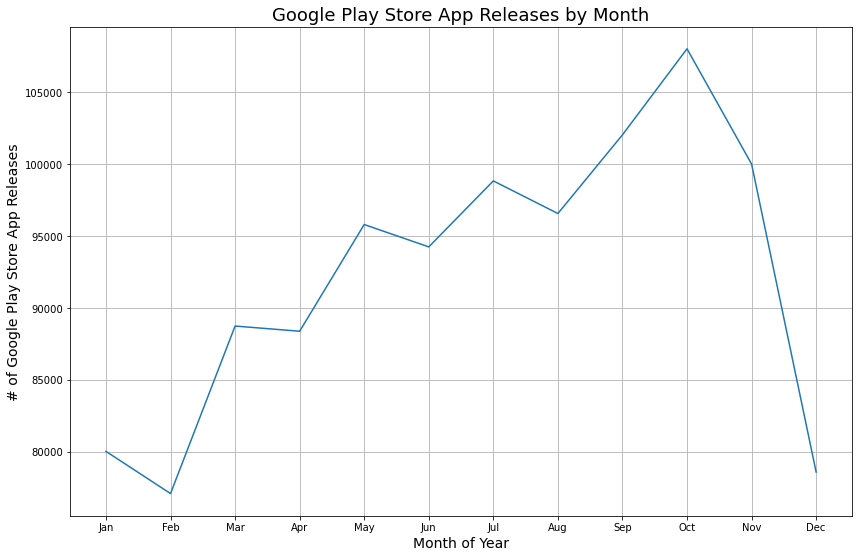

In [108]:
# Plot the Google App releases by month
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = df_APPS_ReleaseMonthSorted;

fig= plt.figure(figsize=(14,9))
plt.grid()
plt.xlabel('Month of Year', fontsize  = 14)
plt.ylabel('# of Google Play Store App Releases', fontsize = 14)
plt.title('Google Play Store App Releases by Month', fontsize  = 18)
APPReleaseTimeOfYearPlot = sns.lineplot(x = x, y = y, palette = 'Greens')

As we can see, the greatest number of apps in the Google Play Store are released in the months of September, October and November. A possible reason for this is that since many of the users are school age, this peak coincidences with the return to school.